# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm 

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




O teste é unilateral à direita, pois estamos interessados em saber se a média da Estratégia B está à direita (maior) da média da Estratégia A na distribuição.

Explicação:
Quando queremos testar se uma média é maior que a outra, usamos teste unilateral à direita; se quiséssemos saber se é menor, seria unilateral à esquerda; e se fosse para verificar se é diferente (tanto para mais quanto para menos), seria bicaudal.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [5]:
# Calculando as médias e variâncias
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)
var_A = np.var(amostra_estrategia_A, ddof=1)  # variância amostral
var_B = np.var(amostra_estrategia_B, ddof=1)

# Exibindo os resultados
print(f"Média Estratégia A: {media_A:.4f}")
print(f"Variância Estratégia A: {var_A:.4f}")
print(f"Média Estratégia B: {media_B:.4f}")
print(f"Variância Estratégia B: {var_B:.4f}")

# Insights
print("\n--- Insights ---")
print(f"1) Diferença de desempenho médio: A Estratégia B teve média {media_B - media_A:.2f} pontos maior que A.")
print("   Isso sugere um desempenho ligeiramente superior de B, mas sem teste estatístico não podemos confirmar significância.")
print(f"2) Dispersão dos dados: A variância de B ({var_B:.2f}) é menor que a de A ({var_A:.2f}), indicando maior consistência.")
print("3) Consistência vs desempenho: B combina notas mais altas e mais estáveis, enquanto A é mais variável.")
print("4) Relevância prática vs estatística: Apesar de B parecer melhor, a diferença pode ser fruto do acaso, reforçando a importância de testes estatísticos.")

Média Estratégia A: 71.4056
Variância Estratégia A: 129.2655
Média Estratégia B: 74.7487
Variância Estratégia B: 110.4700

--- Insights ---
1) Diferença de desempenho médio: A Estratégia B teve média 3.34 pontos maior que A.
   Isso sugere um desempenho ligeiramente superior de B, mas sem teste estatístico não podemos confirmar significância.
2) Dispersão dos dados: A variância de B (110.47) é menor que a de A (129.27), indicando maior consistência.
3) Consistência vs desempenho: B combina notas mais altas e mais estáveis, enquanto A é mais variável.
4) Relevância prática vs estatística: Apesar de B parecer melhor, a diferença pode ser fruto do acaso, reforçando a importância de testes estatísticos.


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [9]:
# Estatísticas básicas
media_A = np.mean(amostra_estrategia_A)
media_B = np.mean(amostra_estrategia_B)
var_A = np.var(amostra_estrategia_A, ddof=1)
var_B = np.var(amostra_estrategia_B, ddof=1)
n_A = len(amostra_estrategia_A)
n_B = len(amostra_estrategia_B)

# Estatística Z
z_stat = (media_B - media_A) / np.sqrt(var_A/n_A + var_B/n_B)

# p-value para teste unilateral à direita (H1: muB > muA)
p_value = 1 - norm.cdf(z_stat)

# Nível de significância
alpha = 0.05

# Impressão dos resultados
print(f"Média A: {media_A:.4f}")
print(f"Variância A: {var_A:.4f}")
print(f"Média B: {media_B:.4f}")
print(f"Variância B: {var_B:.4f}")
print(f"Z calculado: {z_stat:.4f}")
print(f"p-value (unilateral): {p_value:.4f}")

# Decisão
print("\n ---Decisão---")
if p_value < alpha:
    print("✅ Rejeitamos H0: Há evidências de que a Estratégia B tem média maior que a A.")
else:
    print("❌ Não rejeitamos H0: Não há evidências suficientes para afirmar que a Estratégia B é melhor.")

Média A: 71.4056
Variância A: 129.2655
Média B: 74.7487
Variância B: 110.4700
Z calculado: 1.5267
p-value (unilateral): 0.0634

 ---Decisão---
❌ Não rejeitamos H0: Não há evidências suficientes para afirmar que a Estratégia B é melhor.


Pois não há evidência estatisticamente significativa, ao nível de 5%, para afirmar que a Estratégia B possui média maior que a A.

No entanto, o p-value está muito próximo de 0,05, o que indica que a diferença pode ser relevante em um nível de significância mais flexível (por exemplo, 10%).

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

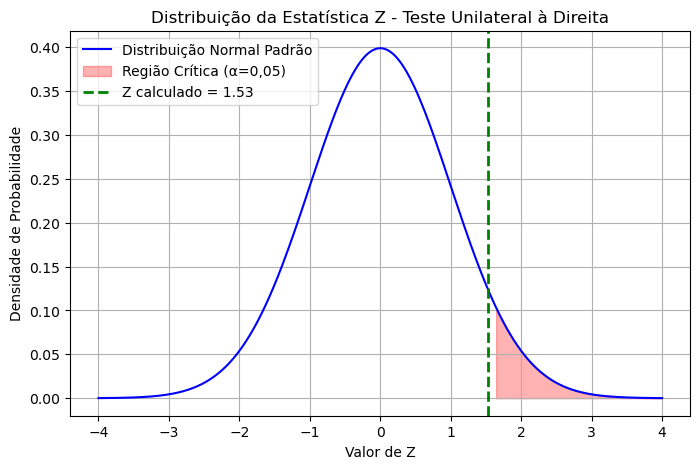

In [10]:
# Valores já calculados
media_A = 71.4056
media_B = 74.7487
var_A = 129.2655
var_B = 110.4700
n_A = 50
n_B = 50
alpha = 0.05

# Estatística Z
z_stat = (media_B - media_A) / np.sqrt(var_A/n_A + var_B/n_B)

# Curva normal padrão
x = np.linspace(-4, 4, 500)
y = norm.pdf(x, 0, 1)

# Região crítica
z_crit = norm.ppf(1 - alpha)
x_crit = np.linspace(z_crit, 4, 200)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, label="Distribuição Normal Padrão", color="blue")
plt.fill_between(x_crit, norm.pdf(x_crit), color="red", alpha=0.3, label="Região Crítica (α=0,05)")
plt.axvline(z_stat, color="green", linestyle="--", linewidth=2, label=f"Z calculado = {z_stat:.2f}")
plt.title("Distribuição da Estatística Z - Teste Unilateral à Direita")
plt.xlabel("Valor de Z")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(True)
plt.show()

No gráfico, vemos:

Curva azul: distribuição normal padrão (Z ~ N(0,1)), que representa a distribuição da estatística sob a hipótese nula .

Área vermelha: região crítica do teste unilateral à direita para α = 0,05— valores de Z acima de 1,645 indicariam rejeição de H0.

Linha verde tracejada: valor de Z calculado (≈ 1,54) com base nas amostras.


📌 Observação:
O Z calculado ficou à esquerda do ponto crítico (1,645), ou seja, fora da região crítica. Isso significa que não rejeitamos H0 ao nível de significância de 5%.